<a href="https://colab.research.google.com/github/harrisb002/CS_480/blob/main/Quizes/Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from IPython.display import Image, display

# Mount the drive
drive.mount('/content/drive')

# Define the file path
Q1Graph = '/content/drive/Shared drives/CS480/Quizes/Quiz2Graph.png'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. List the order in which the nodes will be removed from the fringe when applying DFS, BFS, IDS, and UCS (which will be a stack, queue, or a heap in the case of DFS, BFS, and UCS respectively).


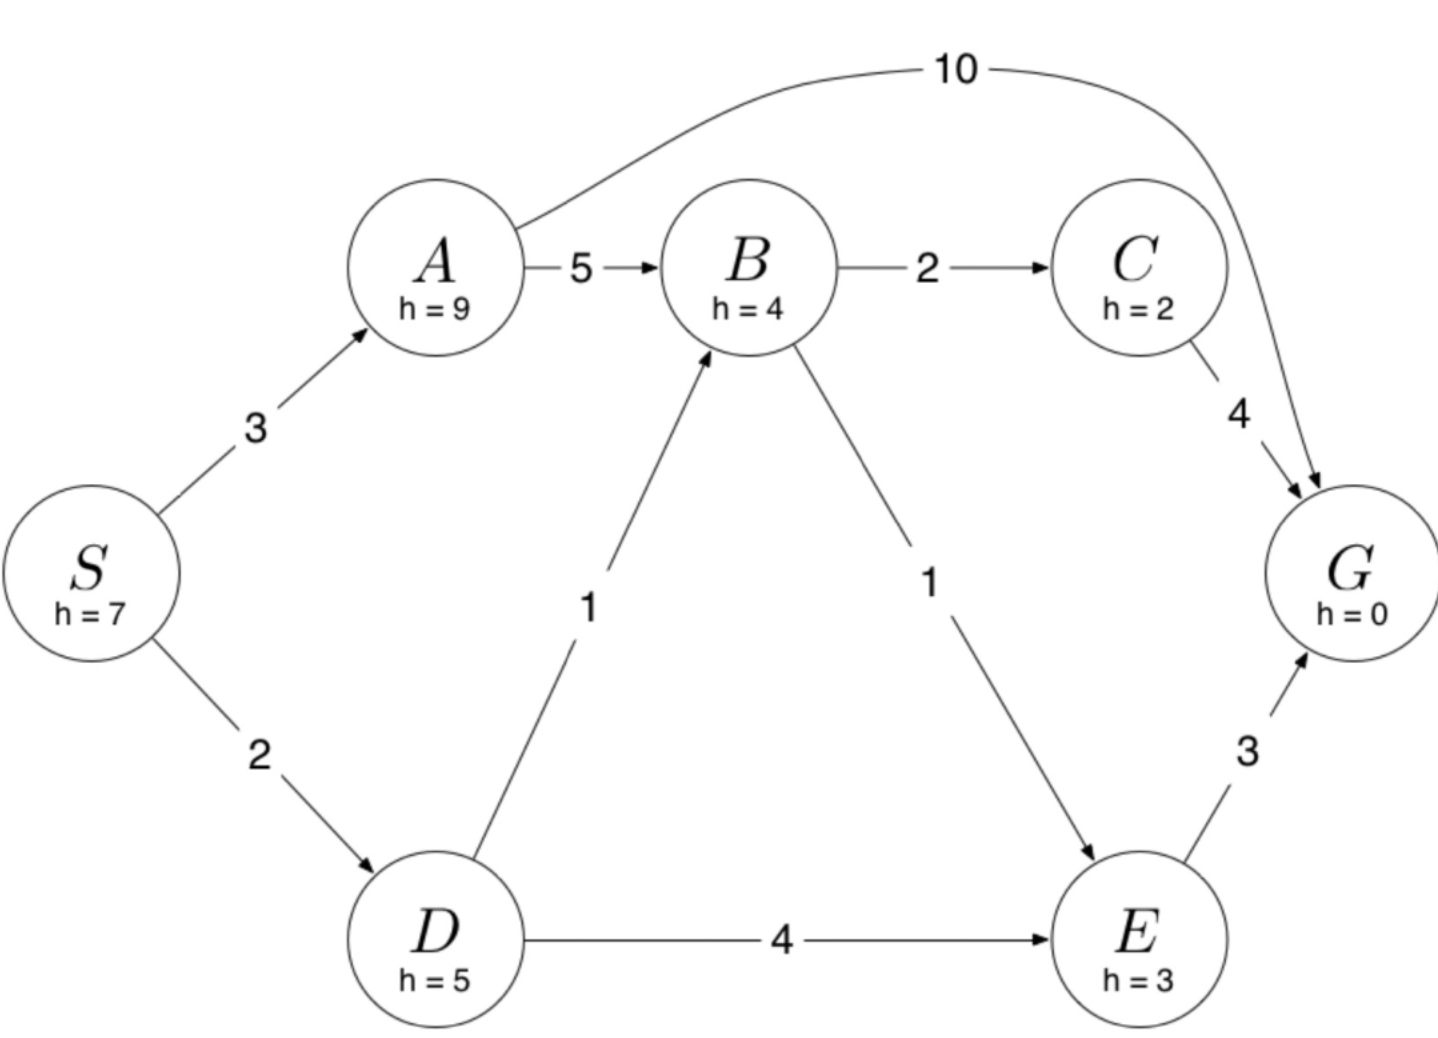

In [ ]:
# Display Graph
display(Image(Q1Graph, width=500))

#### Answer:


##### **DFS (Depth-First Search)**:
Nodes are removed in LIFO (Last-In-First-Out) order because it uses a stack. The node explored first will be the deepest unexplored node.

- Start at S.
- Push A, D onto the stack (S → A → D).
- Explore D first (since DFS uses LIFO, D is on top).
- From D, push B, E onto the stack (S → D → B → E).
- Continue with E,
- then push G onto the stack (S → D → E → G).
- Since G is the goal, DFS ends here.

##### **BFS (Breadth-First Search)**: Nodes are removed in FIFO (First-In-First-Out) order because it uses a queue. Nodes at the current level are expanded before moving to the next level.

- Start at S.
- Enqueue A, D (S → A → D).
- Dequeue and explore A.
- From A, enqueue B (S → A → D → B).
- Dequeue and explore D.
- From D, enqueue B, E (S → A → D → B → E).
- Dequeue B, then enqueue C (S → A → D → B → E → C).
- Dequeue and explore E.
- From E, enqueue G (S → A → D → B → E → C → G).
- Dequeue and explore C, then enqueue G (S → A → D → B → E → C → G).
- Dequeue G (Goal reached)

##### **IDS (Iterative Deepening Search)**: Nodes are removed similar to DFS within each depth level, but the depth limit increases incrementally, combining the benefits of DFS and BFS.

- Depth 0: Only S is explored (S).
- Depth 1: Explore S and A, D (S → A → D).
- Depth 2: Explore S, A, D, B, E (S → A → D → B → E).
- Depth 3: Explore S, A, D, B, E, C, G (S → A → D → B → E → C → G).

##### **UCS (Uniform Cost Search)**: Nodes are removed based on the lowest cumulative cost, meaning it uses a priority queue (heap). The node with the smallest path cost is expanded first.

- Start at S, with cumulative cost 0.
- Explore the cheapest node first: D (cost 2).
- From D, push E (total cost 6) and B (total cost 3) onto the priority queue.
- B is explored next (cost 3).
- From B, push C (total cost 5) and G (total cost 13).
- Next, explore A (cost 3).
- From A, push B (already explored) onto the priority queue.
- Explore E (cost 6), push G (cost 9) onto the priority queue.
- Finally, explore C (cost 5), then G (cost 9).

### 2. Consider a search problem in which the search graph is a binary tree with all leaf nodes at depth 5 (root is considered to be at depth 0) and the only goal node is the 10th leaf node from the left. What is the total number of nodes expanded by the (recursive version of) DFS and BFS? (Assume that the children of the nodes are considered in the left, right order.)

Answer:

DFS (Depth-First Search): Since DFS will explore as deep as possible before backtracking, it will explore all the nodes in the left subtree until it finds the 10th leaf node. This means DFS will expand a total of 31 nodes (all nodes in the subtree including the goal node).

BFS (Breadth-First Search): BFS explores all nodes level by level. To reach the 10th leaf node, BFS will expand nodes across all levels until it finds the goal node. This results in 21 nodes being expanded (15 nodes at levels 0 through 3, and 6 nodes at level 4).

**Assumtptions:**
- Root Depth (Depth 0): The binary tree starts at the root, which is at depth 0.
- Leaf Nodes: All leaf nodes are at depth 5.
- Goal Node: The 10th leaf node from the left is the only goal node.
- Node Expansion Order: When expanding nodes, the children are always considered in left-to-right order.

**Notes**
- A Binary Tree
  - Has nodes that each have up to two children: a left child and a right child.
  -  At depth d, there are 2^d
  nodes.
  - Total nodes at depth D (from root to the current depth) is 2^d+1


##### **Depth-First Search (DFS)**

- Starts from the root at depth 0 and expands nodes down the leftmost path first.
T- o reach the 10th leaf node, DFS will first traverse down to the leftmost leaf (node 1).
- DFS continues to explore each leftmost path until it reaches the 10th leaf node.

**DFS Total Expanded Nodes:**

- DFS expands all nodes along the path from the root to the 10th leaf, totaling:
- 1 + 2 + 4 + 8 + 16 + 10 = 41
1+2+4+8+16+10=41 nodes expanded.

##### **Breadth-First Search (BFS)**
- BFS starts from the root at depth 0, expanding all nodes at each depth before moving deeper.
- To find the 10th leaf node, BFS will first expand the entire tree up to the 5th depth level.
S- ince BFS works level by level, it will expand all nodes at depth 0, 1, 2, 3, 4, and finally at depth 5, where the leaf nodes are located.

- BFS starts from the root at depth 0, expanding all nodes at each depth before moving deeper.
- To find the 10th leaf node, BFS will first expand the entire tree up to the 5th depth level.
- Since BFS works level by level, it will expand all nodes at depth 0, 1, 2, 3, 4, and finally at depth 5, where the leaf nodes are located.

### 3. Which of the following are true? Explain.

(a) In the unweighted case of state-space search using BFS, if the (unique) goal node is at distance d from the start state, all nodes at distance less than d will enter and leave the queue.

**Answer: True.** BFS guarantees that all nodes at a distance less than d will be explored before any node at distance d is explored because BFS explores all nodes level by level.

(b) In a binary heap with n keys, searching for a key can be done with O(log n) comparisons in the worst-case. (To search for a key x, the only operations allowed are to compare x with the keys stored in the heap, other than index operations.)

**Answer: False.** Searching for an arbitrary key in a binary heap is not guaranteed to be O(log n) because the structure of the heap does not allow for efficient arbitrary searches. It only allows for efficient retrieval of the minimum (or maximum) element in O(log n) time, not general key searches.


(c) IDS will terminate in a finite number of steps even if the state-space graph has cycles so long as the goal node is reachable from the start state.

**Answer: True.** IDS combines the space efficiency of DFS with the completeness of BFS by progressively deepening the search. Even with cycles, it will eventually explore all nodes up to the goal, ensuring termination in finite steps if the goal is reachable.

### 4. Consider the problem of sorting a binary string by reversing substrings (of length at least 2) as the operation. For example, you can sort 10100 as follows: 10100 -> 01100 -> 00011.

(a) What is the size of the state-space graph for the case in which the starting state is 10010101? (Only states reachable from the start state are considered as part of the state-space graph.)


**Answer:**


(b) What are the successors of the state 10010101?

**Answer:**
